In [38]:
import sys
import os
sys.path.append(os.path.abspath(".."))

In [39]:
import pandas as pd
from pathlib import Path
import json
from prepare_data.data_loader import load_data

df_merged, json_data= load_data("../data/raw/_annotations.coco.json")
df_merged.head()


,category_id,category_name,supercategory,image_id,license,file_name,height,width,date_captured,extra.name,id,bbox,area,segmentation,iscrowd
0,1,fire,wildfire,1,1,cl6kgm9qr002yc455g5qs87kz_2_FALSE_COLOR_jpg.rf...,860,1200,2025-09-14T12:06:19+00:00,cl6kgm9qr002yc455g5qs87kz_2_FALSE_COLOR.jpg,0,"[277, 207, 568.95, 591.79]",336698.921,[],0
1,1,fire,wildfire,2,1,cl6odzs5e002oao55heuig0a6_1_TRUE_COLOR_jpg.rf....,860,1200,2025-09-14T12:06:19+00:00,cl6odzs5e002oao55heuig0a6_1_TRUE_COLOR.jpg,1,"[800, 0, 157.45, 413.38]",65086.681,[],0
2,1,fire,wildfire,2,1,cl6odzs5e002oao55heuig0a6_1_TRUE_COLOR_jpg.rf....,860,1200,2025-09-14T12:06:19+00:00,cl6odzs5e002oao55heuig0a6_1_TRUE_COLOR.jpg,2,"[1062, 96, 58.37, 63.91]",3730.427,[],0
3,1,fire,wildfire,2,1,cl6odzs5e002oao55heuig0a6_1_TRUE_COLOR_jpg.rf....,860,1200,2025-09-14T12:06:19+00:00,cl6odzs5e002oao55heuig0a6_1_TRUE_COLOR.jpg,3,"[452, 442, 410.09, 350.6]",143777.554,[],0
4,1,fire,wildfire,2,1,cl6odzs5e002oao55heuig0a6_1_TRUE_COLOR_jpg.rf....,860,1200,2025-09-14T12:06:19+00:00,cl6odzs5e002oao55heuig0a6_1_TRUE_COLOR.jpg,4,"[0, 163, 336.16, 375.08]",126086.893,[],0


In [40]:
df_merged.describe()

,category_id,image_id,license,height,width,id,area,iscrowd
count,959.0,959.000000,959.0,959.0,959.0,959.000000,9.590000e+02,959.0
mean,1.0,248.694473,1.0,860.0,1200.0,479.000000,1.016455e+05,0.0
std,0.0,144.208724,0.0,0.0,0.0,276.983754,1.656238e+05,0.0
min,1.0,1.000000,1.0,860.0,1200.0,0.000000,2.070000e-01,0.0
25%,1.0,123.000000,1.0,860.0,1200.0,239.500000,1.044102e+04,0.0
50%,1.0,247.000000,1.0,860.0,1200.0,479.000000,3.462144e+04,0.0
75%,1.0,377.500000,1.0,860.0,1200.0,718.500000,1.135703e+05,0.0
max,1.0,499.000000,1.0,860.0,1200.0,958.000000,1.032000e+06,0.0


In [41]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 959 entries, 0 to 958
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   category_id    959 non-null    int64  
 1   category_name  959 non-null    object 
 2   supercategory  959 non-null    object 
 3   image_id       959 non-null    int64  
 4   license        959 non-null    int64  
 5   file_name      959 non-null    object 
 6   height         959 non-null    int64  
 7   width          959 non-null    int64  
 8   date_captured  959 non-null    object 
 9   extra.name     959 non-null    object 
 10  id             959 non-null    int64  
 11  bbox           959 non-null    object 
 12  area           959 non-null    float64
 13  segmentation   959 non-null    object 
 14  iscrowd        959 non-null    int64  
dtypes: float64(1), int64(7), object(7)
memory usage: 112.5+ KB


In [42]:
compte_par_colonne = df_merged.isnull().sum()
print(compte_par_colonne)

category_id      0
category_name    0
supercategory    0
image_id         0
license          0
file_name        0
height           0
width            0
date_captured    0
extra.name       0
id               0
bbox             0
area             0
segmentation     0
iscrowd          0
dtype: int64


In [43]:
def explore_data(df, json_data):
    n_images = len(json_data['images'])
    n_annotations = len(json_data['annotations'])
    n_categories = len(json_data['categories'])
    category_names = df['category_name'].unique()
    images_height = [image['height'] for image in json_data['images']]
    images_width = [image['width'] for image in json_data['images']]
    annotations_per_image = df.groupby('image_id').size()

    print(f'Number of images: {n_images}')
    print(f'Number of annotations {n_annotations}')
    print(
        f'Annotations per image: MIN: {min(annotations_per_image)}, MAX: {max(annotations_per_image)}, AVG: {annotations_per_image.mean():.2f}'
    )
    print(f'\nNumber of categories: {n_categories}')
    print(f'Unique categories {category_names}')
    print(
        f'\nHeight values: MIN: {min(images_height)}, MAX: {max(images_height)}, AVG: {sum(images_height) / len(images_height)}'
    )
    print(
        f'Width values: MIN: {min(images_width)}, MAX: {max(images_width)}, AVG: {sum(images_width) / len(images_width)}'
    )
    if min(images_height) == max(images_height) and min(images_width) == max(
        images_width
    ):
        print('Conclusion: all images are the same size.')


explore_data(df_merged, json_data)



Number of images: 500
Number of annotations 959
Annotations per image: MIN: 1, MAX: 10, AVG: 1.95

Number of categories: 2
Unique categories ['fire']

Height values: MIN: 860, MAX: 860, AVG: 860.0
Width values: MIN: 1200, MAX: 1200, AVG: 1200.0
Conclusion: all images are the same size.


In [44]:
df_merged, json_data = load_data('../data/raw/_annotations.coco.json')

In [45]:

coco_path = "../data/raw/_annotations.coco.json" 

df_merged, json_data = load_data(coco_path)

df_images = pd.json_normalize(json_data["images"])  # ici 'id' est l'id image original
df_annotations = pd.json_normalize(json_data["annotations"])
df_categories = pd.json_normalize(json_data["categories"]).rename(
    columns={"id": "category_id", "name": "category_name"}
)

print("images:", df_images["id"].nunique(),
    "| annotations:", len(df_annotations),
    "| catégories:", df_categories["category_name"].tolist())

assert "bbox" in df_merged.columns and "image_id" in df_merged.columns and "category_id" in df_merged.columns
row = df_merged.sample(1, random_state=0).iloc[0]
print("sample -> file_name:", row["file_name"], "| bbox:", row["bbox"], "| category:", row.get("category_name", row["category_id"]))


images: 500 | annotations: 959 | catégories: ['wildfire', 'fire']
sample -> file_name: cl6e1pf9j001ggk55feroguvj_2_FALSE_COLOR_jpg.rf.e5ddab20106f684b690b93f0baa84175.jpg | bbox: [665, 250, 38.5, 61.25] | category: fire


In [46]:
# Nombres clés
n_images = df_merged["image_id"].nunique()
n_annots = len(df_merged)
print("Images:", n_images, "| Annotations:", n_annots)

# Résumé catégories
cats_df = df_merged[["category_id", "category_name"]].drop_duplicates().sort_values("category_id")
annots_per_cat = df_merged["category_id"].value_counts().sort_index().to_frame("annotations_count")
imgs_per_cat = df_merged.groupby("category_id")["image_id"].nunique().to_frame("unique_images_count")
summary = cats_df.set_index("category_id").join(annots_per_cat).join(imgs_per_cat).reset_index()
display(summary)

# Stats annotations par image
annots_per_image = df_merged.groupby("image_id")["bbox"].count()
display(annots_per_image.describe().to_frame("annotations_per_image_stats").T)

# Stats largeur/hauteur des bboxes
wh = df_merged["bbox"].apply(lambda b: pd.Series({"w": float(b[2]), "h": float(b[3])}))
display(wh.describe())


Images: 493 | Annotations: 959


,category_id,category_name,annotations_count,unique_images_count
0,1,fire,959,493


,count,mean,std,min,25%,50%,75%,max
annotations_per_image_stats,493.0,1.945233,1.405218,1.0,1.0,1.0,2.0,10.0


,w,h
count,959.000000,959.000000
mean,265.002117,246.731241
std,235.118069,197.165513
min,0.190000,1.090000
25%,99.145000,95.595000
50%,190.110000,183.130000
75%,356.340000,337.440000
max,1200.000000,860.000000


In [47]:
#Images sans annotations
imgs_wo_ann = df_images[~df_images["id"].isin(df_annotations["image_id"].unique())]
print("Images SANS annotations :", len(imgs_wo_ann))
imgs_wo_ann.head()


Images SANS annotations : 7


,id,license,file_name,height,width,date_captured,extra.name
0,0,1,cl6e1qges001kgk555z158f33_2_FALSE_COLOR_jpg.rf...,860,1200,2025-09-14T12:06:19+00:00,cl6e1qges001kgk555z158f33_2_FALSE_COLOR.jpg
96,96,1,cl6kf5xzo000gc4552qc8hhcc_2_FALSE_COLOR_jpg.rf...,860,1200,2025-09-14T12:06:19+00:00,cl6kf5xzo000gc4552qc8hhcc_2_FALSE_COLOR.jpg
118,118,1,cl6e2kygp002egk55asrs2brz_1_TRUE_COLOR_jpg.rf....,860,1200,2025-09-14T12:06:19+00:00,cl6e2kygp002egk55asrs2brz_1_TRUE_COLOR.jpg
122,122,1,cl6e3enfn003sgk554uim9wo6_1_TRUE_COLOR_jpg.rf....,860,1200,2025-09-14T12:06:19+00:00,cl6e3enfn003sgk554uim9wo6_1_TRUE_COLOR.jpg
209,209,1,cl6kfx47x001tc45578ts0yz6_2_FALSE_COLOR_jpg.rf...,860,1200,2025-09-14T12:06:19+00:00,cl6kfx47x001tc45578ts0yz6_2_FALSE_COLOR.jpg


In [48]:
#Annotations orphelines
orphans = df_annotations[~df_annotations["image_id"].isin(df_images["id"].unique())]
print("Annotations ORPHELINES :", len(orphans))
orphans.head()


Annotations ORPHELINES : 0


,id,image_id,category_id,bbox,area,segmentation,iscrowd


In [49]:
#Invalid bounding boxes:
import numpy as np
b = df_annotations["bbox"].apply(lambda bb: {"w": float(bb[2]), "h": float(bb[3])}).apply(pd.Series)
bad_wh = (b["w"] <= 0) | (b["h"] <= 0) | b["w"].isna() | b["h"].isna()
bad_wh_idx = df_annotations[bad_wh]["id"]
print("BBoxes invalides (w/h ≤ 0 ou NaN) :", bad_wh_idx.shape[0])

BBoxes invalides (w/h ≤ 0 ou NaN) : 0


In [50]:
# indexer tailles image
sizes = df_images.set_index("id")[["width","height"]]

def clip_bbox(bbox, W, H):
    x, y, w, h = map(float, bbox)
    x2, y2 = x+w, y+h
    x  = max(0.0, min(x,  W))
    y  = max(0.0, min(y,  H))
    x2 = max(0.0, min(x2, W))
    y2 = max(0.0, min(y2, H))
    w  = max(0.0, x2 - x)
    h  = max(0.0, y2 - y)
    return [x, y, w, h]

fixed_rows = []
dropped_tiny = []

MIN_WH = 1.0   # ← seuil en pixels minimum après clip

for _, r in df_annotations.iterrows():
    img_id = r["image_id"]
    if img_id not in sizes.index:  # sécurité (mais normalement filtré par l'étape 2)
        continue
    W, H = float(sizes.loc[img_id, "width"]), float(sizes.loc[img_id, "height"])
    new_bbox = clip_bbox(r["bbox"], W, H)
    if (new_bbox[2] < MIN_WH) or (new_bbox[3] < MIN_WH):
        dropped_tiny.append(r["id"])
        continue
    r2 = r.copy()
    r2["bbox"] = new_bbox
    # si 'area' existe, le recalculer
    if "area" in r2:
        r2["area"] = float(new_bbox[2] * new_bbox[3])
    fixed_rows.append(r2)

df_annotations4 = pd.DataFrame(fixed_rows) if fixed_rows else df_annotations.head(0).copy()
print("BBoxes trop petites après clip (supprimées) :", len(dropped_tiny))


BBoxes trop petites après clip (supprimées) : 1


In [51]:
DEFAULT_IMG_EXTS = {".jpg", ".jpeg"}


def list_extensions(image_dir: str | Path) -> set[str]:
    image_dir = Path(image_dir)
    return {p.suffix.lower() for p in image_dir.glob("*") if p.is_file()}


def check_disk_vs_coco(
    df_images: pd.DataFrame,
    image_dir: str | Path,
    valid_ext: set[str] = DEFAULT_IMG_EXTS,
    case_insensitive: bool = True,
):
    image_dir = Path(image_dir)

    def norm(name: str) -> str:
        name = Path(name).name
        return name.lower() if case_insensitive else name

    # fichiers attendus par COCO (filtrés par extension image)
    coco_files = {
        norm(fn)
        for fn in df_images["file_name"].astype(str)
        if Path(fn).suffix.lower() in valid_ext
    }

    # fichiers présents sur disque (filtrés par extension image)
    disk_files = {
        norm(p.name)
        for p in image_dir.glob("*")
        if p.is_file() and p.suffix.lower() in valid_ext
    }

    missing_on_disk = sorted(coco_files - disk_files)
    extra_on_disk = sorted(disk_files - coco_files)
    return missing_on_disk, extra_on_disk

def images_without_annotations(
    df_images: pd.DataFrame, df_annotations: pd.DataFrame
) -> pd.DataFrame:
    """
    Images présentes dans COCO mais sans aucune annotation.
    df_images doit contenir 'id' ; df_annotations doit contenir 'image_id'.
    """
    return df_images[
        ~df_images["id"].isin(pd.unique(df_annotations["image_id"]))
    ].copy()


def annotations_without_image(
    df_annotations: pd.DataFrame, df_images: pd.DataFrame
) -> pd.DataFrame:
    """
    Annotations dont 'image_id' ne correspond à aucune image.
    """
    return df_annotations[
        ~df_annotations["image_id"].isin(pd.unique(df_images["id"]))
    ].copy()


def find_annotation_outliers(df_annotations: pd.DataFrame) -> pd.DataFrame:
    """
    Bboxes aberrantes (w<=0, h<=0, NaN). COCO bbox = [x,y,w,h].
    """
    b = (
        df_annotations["bbox"]
        .apply(lambda bb: {"w": float(bb[2]), "h": float(bb[3])})
        .apply(pd.Series)
    )
    mask = (b["w"] <= 0) | (b["h"] <= 0) | b["w"].isna() | b["h"].isna()
    return df_annotations[mask].copy()

In [52]:

IMAGE_DIR = "../data/raw" 

coco_path = "../data/cleaned/_annotations.coco.cleaned.json"
df_merged, json_data = load_data(coco_path)

df_images      = pd.json_normalize(json_data["images"])
df_annotations = pd.json_normalize(json_data["annotations"])

IMAGE_DIR = "../data/raw"  

# 1) Extensions brutes (diagnostic)
print("Extensions trouvées (brut) :", list_extensions(IMAGE_DIR))

# 2) Comparaison **uniquement sur .jpg**
missing_on_disk, extra_on_disk = check_disk_vs_coco(
    df_images,
    IMAGE_DIR,
)

print("Fichiers .jpg attendus par COCO mais absents sur disque :", len(missing_on_disk))
print("Fichiers .jpg présents sur disque mais non listés dans COCO :", len(extra_on_disk))

# 3) Incohérences côté annotations/images (niveau COCO)
imgs_wo_ann = images_without_annotations(df_images, df_annotations)
orphans     = annotations_without_image(df_annotations, df_images)
outliers    = find_annotation_outliers(df_annotations)

print("Images sans annotations (COCO) :", len(imgs_wo_ann))
print("Annotations orphelines (COCO)  :", len(orphans))
print("BBoxes aberrantes (COCO)      :", len(outliers))



Extensions trouvées (brut) : {'.identifier', '.jpg', '.json'}
Fichiers .jpg attendus par COCO mais absents sur disque : 0
Fichiers .jpg présents sur disque mais non listés dans COCO : 7


Images sans annotations (COCO) : 0
Annotations orphelines (COCO)  : 0
BBoxes aberrantes (COCO)      : 0


In [53]:
!pwd


/home/emese/Briefs/Detection_incendies/Detection_incendies/notebooks


In [54]:
for image in extra_on_disk:
    imagePath = Path(image)
    print(image)
    fullPath =Path(IMAGE_DIR)/imagePath
    print(fullPath)
    os.remove(fullPath)



cl6b5myi60048l45530d5anq4_1_true_color_jpg.rf.1b9e229b9d66a61c1d9a410fd8ad6f23.jpg
../data/raw/cl6b5myi60048l45530d5anq4_1_true_color_jpg.rf.1b9e229b9d66a61c1d9a410fd8ad6f23.jpg


FileNotFoundError: [Errno 2] No such file or directory: '../data/raw/cl6b5myi60048l45530d5anq4_1_true_color_jpg.rf.1b9e229b9d66a61c1d9a410fd8ad6f23.jpg'

In [ ]:
extra_on_disk


['cl6b5myi60048l45530d5anq4_1_true_color_jpg.rf.1b9e229b9d66a61c1d9a410fd8ad6f23.jpg',
 'cl6b5x63r005il4551chxdt93_2_false_color_jpg.rf.8c4fb06b6812031edb1ad781ec14d2b9.jpg',
 'cl6e1qges001kgk555z158f33_2_false_color_jpg.rf.479904c9e54c6ba121689341598bf3ed.jpg',
 'cl6e2kygp002egk55asrs2brz_1_true_color_jpg.rf.2a198a37785242fb6db3ef21c0ffdcad.jpg',
 'cl6e3enfn003sgk554uim9wo6_1_true_color_jpg.rf.beaf169c01f4596cb24c1c4628ef21f1.jpg',
 'cl6kf5xzo000gc4552qc8hhcc_2_false_color_jpg.rf.8fbfb16c6d86076d860904397218acd5.jpg',
 'cl6kfx47x001tc45578ts0yz6_2_false_color_jpg.rf.5a9501946306fabdad807a6acb61ccbe.jpg']

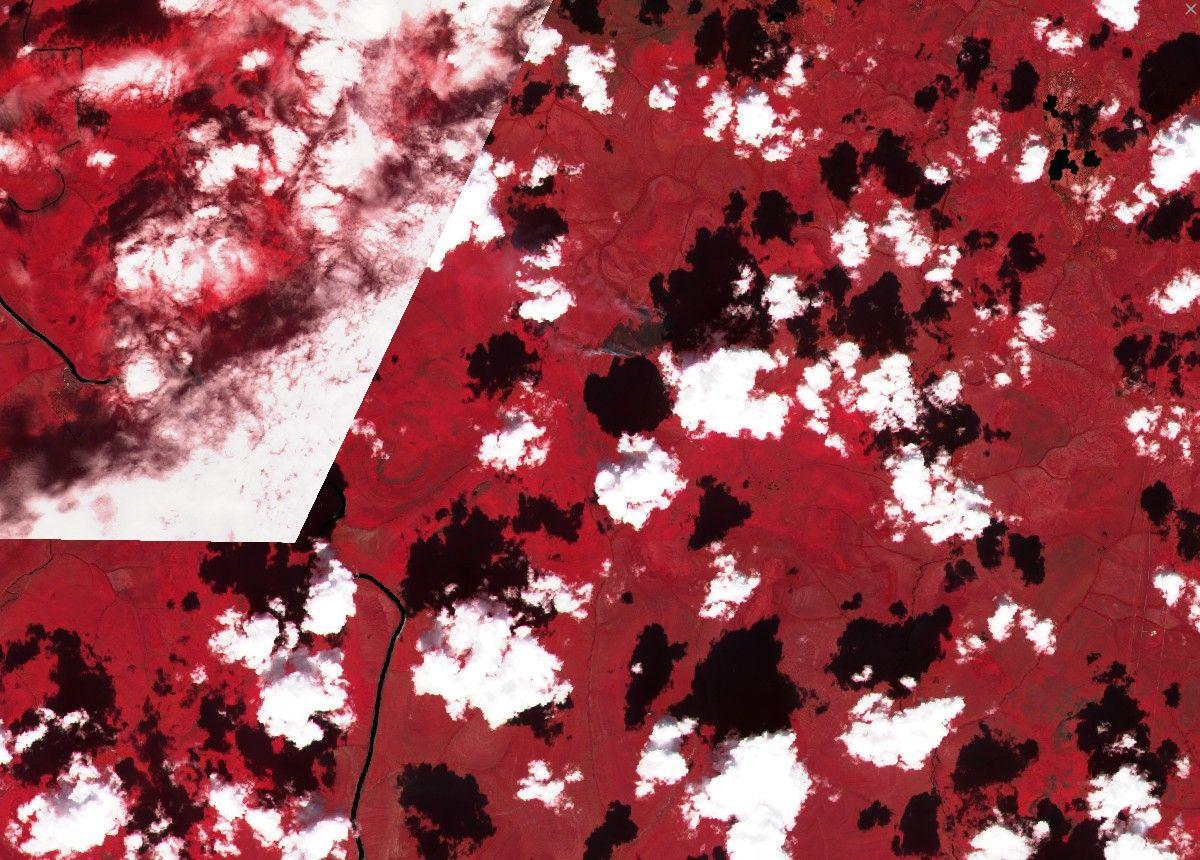

In [ ]:
from PIL import Image
img_path = "/home/emese/Briefs/Detection_incendies/Detection_incendies/data/raw/cl6az56oy0003f05554mh92wy_2_FALSE_COLOR_jpg.rf.80849284d2ee075dcfd0d457f4c20b7a.jpg"
Image.open(img_path)


In [ ]:
# retirer les images sans annotations
df_images_clean = df_images[~df_images["id"].isin(imgs_wo_ann["id"])].copy()

# par sécurité, ne garder que les annotations qui pointent vers une image qui reste
df_annotations_clean = df_annotations4[df_annotations4["image_id"].isin(df_images_clean["id"])].copy()

In [ ]:
df_annotations_clean.shape

(958, 7)

In [ ]:
df_images_clean.shape

(493, 7)

In [ ]:
df_annotations.shape

(958, 7)

In [ ]:
coco_clean = {
    "images": df_images_clean.to_dict(orient="records"),
    "annotations": df_annotations_clean.to_dict(orient="records"),
    "categories": df_categories.to_dict(orient="records"),
}

out_dir = "../data/cleaned"       
Path(out_dir).mkdir(parents=True, exist_ok=True)
out_path = Path(out_dir) / "_annotations_cleaned.coco.json"

with open(out_path, "w", encoding="utf-8") as f:
    json.dump(coco_clean, f, ensure_ascii=False, indent=2)

print("COCO nettoyé sauvegardé →", out_path)

COCO nettoyé sauvegardé → ../data/cleaned/_annotations_cleaned.coco.json


In [ ]:
df_images_clean['fullPath'] = df_images_clean["file_name"].apply(lambda file:os.path.join(IMAGE_DIR, file))
#df_images_clean.head()
df_images_clean['exist'] = df_images_clean['fullPath'].apply(os.path.exists)
df_images_clean.head()
df_images_clean[~df_images_clean["exist"]]

,id,license,file_name,height,width,date_captured,extra.name,fullPath,exist


In [ ]:
def get_images_without_annotation(json_data: dict, need_print: bool = True) -> list:
    """
    Returns a list of image ids that do not have any annotation.
    Args:
        json_data: dict
    Returns:
        images_without_annotation: list
    """
    images_with_annotation = []
    for i in json_data['annotations']:
        if i['image_id'] not in images_with_annotation:
            images_with_annotation.append(i['image_id'])
    images_without_annotation = [
        i['id'] for i in json_data['images'] if i['id'] not in images_with_annotation
    ]
    if need_print:
        print(f'· Found {len(images_without_annotation)} images without annotations.')
    return images_without_annotation

get_images_without_annotation(json_data)

· Found 0 images without annotations.


[]

In [ ]:
def check_image_files(
    df: pd.DataFrame, directory_path: str, need_print: bool = True
) -> pd.DataFrame:
    """
    Checks if all images in provided dataframe actually exist in provided path.
    Args:
        df: pd.DataFrame
        directory_path: str
    Returns:
        not_found_in_directory: pd.DataFrame
    """
    df['full_path'] = df['file_name'].apply(lambda x: os.path.join(directory_path, x))
    df['file_exists'] = df['full_path'].apply(lambda x: os.path.exists(x))
    not_found_in_directory = df[~df['file_exists']]
    if need_print:
        print(
            f'· {len(not_found_in_directory)} of the images in provided dataframe were not found in {directory_path}'
        )
    return pd.DataFrame(not_found_in_directory)

In [ ]:
import os

import fiftyone as fo
import fiftyone.zoo as foz

COCO_JSON = "../data/raw/_annotations.coco.json" 
IMAGE_DIR  = "../data/raw"                                    

dataset_name = "wildfire_coco_clean"

if fo.dataset_exists(dataset_name):
    fo.delete_dataset(dataset_name)

dataset = fo.Dataset.from_dir(
    dataset_type=fo.types.COCODetectionDataset,  
    data_path=IMAGE_DIR,                        
    labels_path=COCO_JSON,                       
    label_field="ground_truth",             
    name=dataset_name,
)


 100% |█████████████████| 500/500 [1.5s elapsed, 0s remaining, 324.8 samples/s]         


In [ ]:
session = fo.launch_app(dataset)
session.wait()

Notebook sessions cannot wait


In [ ]:
from ultralytics.data.converter import convert_coco

convert_coco(
    labels_dir="/home/emese/Briefs/Detection_incendies/Detection_incendies/data/cleaned",
    save_dir="coco_converted"
)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/home/emese/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Annotations /home/emese/Briefs/Detection_incendies/Detection_incendies/data/cleaned/_annotations.coco.cleaned.json: 100% ━━━━━━━━━━━━ 493/493 4.6Kit/s 0.1s0.0s
Annotations /home/emese/Briefs/Detection_incendies/Detection_incendies/data/cleaned/_annotations_cleaned.coco.json: 100% ━━━━━━━━━━━━ 493/493 4.5Kit/s 0.1s0.0s
COCO data converted successfully.
Results saved to /home/emese/Briefs/Detection_incendies/Detection_incendies/notebooks/coco_converted


In [55]:
def coco_to_yolo(coco_json_path, out_labels_dir, allow_empty=False):
    """
    Convert a COCO annotations file to YOLO text labels (single class -> id 0).

    Parameters
    ----------
    coco_json_path : str | Path
        Path to _annotations.coco.json (preferably the cleaned one)
    out_labels_dir : str | Path
        Folder where .txt label files will be written
    allow_empty : bool
        If True, also create an empty .txt for images with no annotations (negatives)

    Returns
    -------
    df_images : pd.DataFrame
        The COCO images table (useful for later split)
    """
    out_dir = Path(out_labels_dir)
    out_dir.mkdir(parents=True, exist_ok=True)

    coco = json.loads(Path(coco_json_path).read_text(encoding="utf-8"))
    df_images = pd.json_normalize(coco["images"])
    df_ann = pd.json_normalize(coco["annotations"])

    # Index image sizes for normalization
    sizes = df_images.set_index("id")[["width", "height"]]

    # Group YOLO lines per image
    lines_by_img = {}  # image_id -> [str, str, ...]
    if not df_ann.empty:
        for _, r in df_ann.iterrows():
            img_id = int(r["image_id"])
            if img_id not in sizes.index:
                continue
            W, H = float(sizes.loc[img_id, "width"]), float(sizes.loc[img_id, "height"])
            x, y, w, h = r["bbox"]  # COCO (pixels)

            # Convert to YOLO (normalized)
            x_c = (float(x) + float(w) / 2.0) / W
            y_c = (float(y) + float(h) / 2.0) / H
            wn = float(w) / W
            hn = float(h) / H

            # Clamp to [0,1] just in case
            x_c = min(max(x_c, 0.0), 1.0)
            y_c = min(max(y_c, 0.0), 1.0)
            wn = min(max(wn, 0.0), 1.0)
            hn = min(max(hn, 0.0), 1.0)

            # Single class -> 0
            line = f"0 {x_c:.6f} {y_c:.6f} {wn:.6f} {hn:.6f}"
            lines_by_img.setdefault(img_id, []).append(line)

    # Write one .txt file per image (empty if allow_empty=True and none found)
    for _, row in df_images.iterrows():
        img_id = int(row["id"])
        base = Path(row["file_name"]).name  # use basename
        lbl = out_dir / Path(base).with_suffix(".txt")  # same name, .txt
        lines = lines_by_img.get(img_id, [])
        if lines or allow_empty:
            lbl.write_text("\n".join(lines), encoding="utf-8")

    return df_images

In [ ]:
from prepare_data.coco_to_yolo import coco_to_yolo

COCO_JSON      = "../data/cleaned/_annotations.coco.cleaned.json"
OUT_LABELS_DIR = "../data/labels_all"

df_images = coco_to_yolo(
    coco_json_path=COCO_JSON,
    out_labels_dir=OUT_LABELS_DIR,
    allow_empty=False  # set True if you want .txt files for images without objects
)

n_txt = len(list(Path(OUT_LABELS_DIR).glob("*.txt")))
print("label files:", n_txt)


label files: 493


Conversion COCO → YOLO + split 70/20/10

Split image IDs into train/val/test (e.g., 70/20/10) with train_test_split.

In [ ]:
from pathlib import Path
import shutil
import json
import pandas as pd
from sklearn.model_selection import train_test_split

# ====== CONFIG À ADAPTER ======
IMAGE_DIR   = Path("../data/raw")                # dossier où sont TOUTES les images
LABELS_ALL  = Path("../data/labels_all")          # .txt YOLO générés (1 par image)
OUT_ROOT    = Path("../data/dataset")             # cible: dataset/{train,val,test}

SPLITS = (0.7, 0.2, 0.1)  # train, val, test
CLASS_NAME = "fire"       # nom de la classe 


# ====== 1) Liste des images & labels correspondants ======
# Méthode robuste: on ne garde que les images pour lesquelles on a un .txt
image_paths = []
label_paths = []

# on considère .jpg/.jpeg (ajoute .png si nécessaire)
for img_path in list(IMAGE_DIR.glob("*.jpg")) + list(IMAGE_DIR.glob("*.jpeg")):
    lbl_path = LABELS_ALL / img_path.with_suffix(".txt").name
    if lbl_path.exists():
        image_paths.append(img_path)
        label_paths.append(lbl_path)

print(f"Images retenues (avec label): {len(image_paths)}")
assert len(image_paths) == len(label_paths)

# (Option) si tu veux baser la liste sur COCO plutôt que sur le disque:
# - charge COCO et mappe file_name -> IMAGE_DIR / basename(file_name)
# - filtre ensuite avec l'existence du .txt dans LABELS_ALL


# ====== 2) Split train/val/test ======
train_size, val_size, test_size = SPLITS
assert abs(train_size + val_size + test_size - 1.0) < 1e-6, "Les ratios doivent sommer à 1.0"

# split train vs temp
train_imgs, temp_imgs = train_test_split(image_paths, train_size=train_size, random_state=42)

# split val vs test à partir de temp (val proportionnel)
val_ratio = val_size / (val_size + test_size) if (val_size + test_size) > 0 else 0.0
val_imgs, test_imgs = train_test_split(temp_imgs, train_size=val_ratio, random_state=42)

print(f"train: {len(train_imgs)}, val: {len(val_imgs)}, test: {len(test_imgs)}")


# ====== 3) Fonction de copie d'un split ======
def materialize_split(split_name: str, imgs: list[Path], image_dir: Path, labels_dir: Path, out_root: Path):
    img_out = out_root / split_name / "images"
    lbl_out = out_root / split_name / "labels"
    img_out.mkdir(parents=True, exist_ok=True)
    lbl_out.mkdir(parents=True, exist_ok=True)

    n_img = n_lbl = 0
    for src_img in imgs:
        # copie image
        dst_img = img_out / src_img.name
        shutil.copy2(src_img, dst_img)
        n_img += 1

        # label avec même base name et extension .txt
        src_lbl = labels_dir / src_img.with_suffix(".txt").name
        if src_lbl.exists():
            dst_lbl = lbl_out / src_lbl.name
            shutil.copy2(src_lbl, dst_lbl)
            n_lbl += 1
        # sinon: si tu veux strictement 1 label par image, tu pourrais supprimer l'image copiée

    return n_img, n_lbl


# ====== 4) Matérialiser les splits ======
ntr = materialize_split("train", train_imgs, IMAGE_DIR, LABELS_ALL, OUT_ROOT)
nva = materialize_split("val",   val_imgs,   IMAGE_DIR, LABELS_ALL, OUT_ROOT)
nte = materialize_split("test",  test_imgs,  IMAGE_DIR, LABELS_ALL, OUT_ROOT)

print("Copiés -> train (images,labels):", ntr)
print("Copiés -> val   (images,labels):", nva)
print("Copiés -> test  (images,labels):", nte)


# ====== 5) Écrire dataset.yaml (single-class) ======
yaml_path = OUT_ROOT / "dataset.yaml"
yaml_text = f"""# YOLO dataset (single class)
path: .
train: train/images
val: val/images
test: test/images

nc: 1
names:
0: {CLASS_NAME}
"""
yaml_path.write_text(yaml_text, encoding="utf-8")
print("YAML écrit ->", yaml_path)


Images retenues (avec label): 493
train: 345, val: 98, test: 50
Copiés -> train (images,labels): (345, 345)
Copiés -> val   (images,labels): (98, 98)
Copiés -> test  (images,labels): (50, 50)
YAML écrit -> ../data/dataset/dataset.yaml


Test

In [ ]:
from pathlib import Path

# comptes par split
for split in ("train","val","test"):
    imgs = list((OUT_ROOT/split/"images").glob("*.jpg")) \
        + list((OUT_ROOT/split/"images").glob("*.jpeg")) \
        + list((OUT_ROOT/split/"images").glob("*.JPG"))  \
        + list((OUT_ROOT/split/"images").glob("*.JPEG"))
    lbls = list((OUT_ROOT/split/"labels").glob("*.txt"))
    print(f"{split:<5} images={len(imgs)} | labels={len(lbls)}")

# un label d'exemple
print("Exemple label:", next((OUT_ROOT/"train/labels").glob("*.txt")).read_text().splitlines()[:3])


train images=345 | labels=345
val   images=98 | labels=98
test  images=50 | labels=50
Exemple label: ['0 0.496492 0.573320 0.464650 0.590826']


Création du fichier tar.gz

In [ ]:
# TAR.GZ (recommandé)
import tarfile
SRC = OUT_ROOT            # "../data/dataset"
DST = OUT_ROOT.parent / "dataset_yolo.tar.gz"
with tarfile.open(DST, "w:gz") as tar:
    tar.add(SRC, arcname="dataset")  # l'archive contiendra dataset/...
print("Archive:", DST)


Archive: ../data/dataset_yolo.tar.gz
